# Plot

## Librairies

In [175]:
import os

import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plot for mode `stdp`

In [273]:
filename = "sim_stdp_1001_seed45.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [274]:
nb_attractors, synapses_l = results[0], results[1]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])

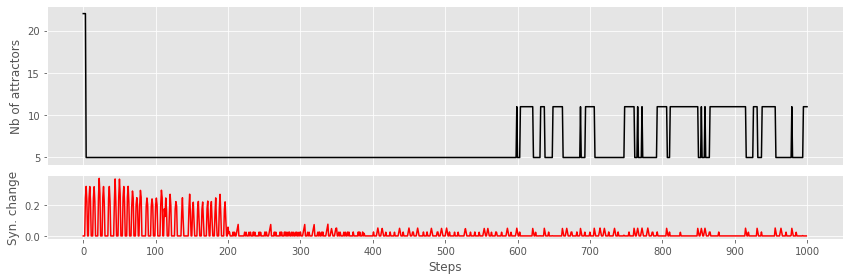

In [275]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
# ## Add colored regions for each input chunk
# for start, end in zip(t0s, t1s):
#     ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `gp`

In [289]:
filename = "sim_gp_1001_seed45.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [293]:
nb_attractors = results[0][1:] # remove first element (initial A)
nb_attractors = [-x for x in nb_attractors]
input_length = int(filename.split("_")[2])

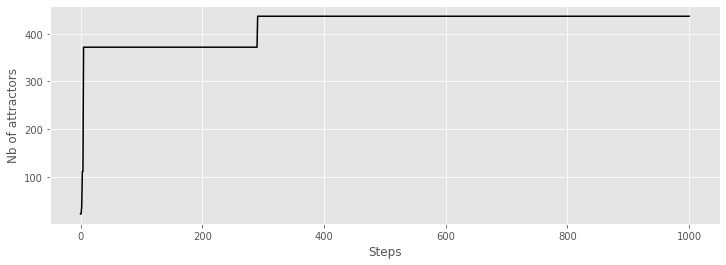

In [296]:
plt.figure(figsize=(12, 4))

# Plot number of attractors
plt.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
plt.xlabel('Steps', size=12)
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `stdp-gp`

In [297]:
filename = "sim_stdp-gp_1001_10_3_seed45.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [298]:
nb_attractors, ticks, synapses_l = results[0], results[1], results[2]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])
target_length = int(filename.split("_")[3])

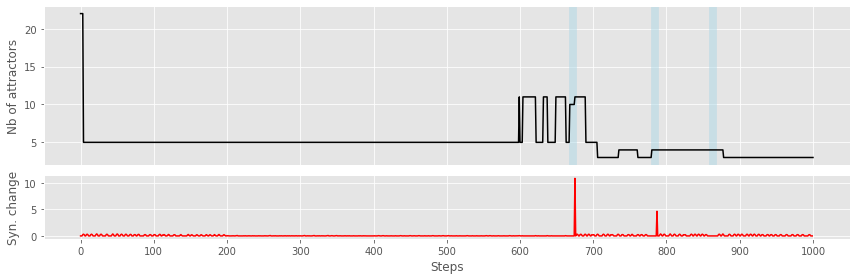

In [299]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Chunks start and end points
t0s = ticks
t1s = [start + target_length for start in t0s]

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()